In [1]:
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

from src.data import MNIST
from src.models import LeNet
from src.training.config import TrainingConfig
from src.training import ModelTrainer
import matplotlib.pyplot as plt

In [2]:
training_config = TrainingConfig(batch_size=100, lr=0.0001)

In [3]:
model = LeNet()

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
training_data = MNIST(train=True, root='./data', transform=transform)
testing_data = MNIST(train=False, root='./data', transform=transform)

C:\Users\raghu\anaconda3\envs\CV\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
len(training_data), len(testing_data)

(60000, 10000)

In [7]:
model_trainer = ModelTrainer(
    model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    training_config,
    training_data,
    cuda=True,
    validation_data=testing_data
)

using NVIDIA GeForce GTX 1060


In [8]:
training_metrics, testing_metrics = model_trainer.train(10, True)

C:\Users\raghu\anaconda3\envs\CV\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


training metrics:   epoch: 0  loss: 0.5548758928353588      accuracy: 85.48               
testing metrics:    epoch: 0  loss: 0.1749721248447895      accuracy: 94.75               
training metrics:   epoch: 1  loss: 0.1443304010418554      accuracy: 95.79               
testing metrics:    epoch: 1  loss: 0.10461343461647629     accuracy: 96.68               
training metrics:   epoch: 2  loss: 0.09754228753969073     accuracy: 97.08333333333333   
testing metrics:    epoch: 2  loss: 0.07487301433458925     accuracy: 97.62               
training metrics:   epoch: 3  loss: 0.07585486860790601     accuracy: 97.72               
testing metrics:    epoch: 3  loss: 0.06622909516096115     accuracy: 97.77               
training metrics:   epoch: 4  loss: 0.06347020298863451     accuracy: 98.11666666666666   
testing metrics:    epoch: 4  loss: 0.054679263969883325    accuracy: 98.22               
training metrics:   epoch: 5  loss: 0.05445999814740692     accuracy: 98.37               

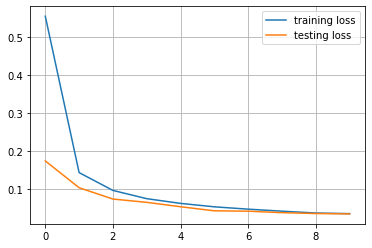

In [9]:
plt.plot(training_metrics.losses, label='training loss')
plt.plot(testing_metrics.losses, label='testing loss')
plt.grid()
plt.legend()

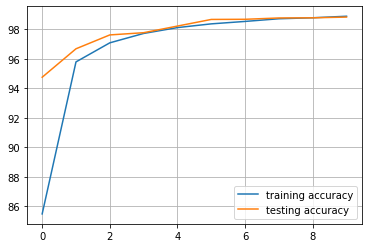

In [10]:
plt.plot(training_metrics.accuracies, label='training accuracy')
plt.plot(testing_metrics.accuracies, label='testing accuracy')
plt.grid()
plt.legend()